다음 셀에 있는 코멘드(`!cat `)가 Windows환경에서는 작동하지 않을 수 있습니다. 
- 이를 해결하기 위한 다양한 방법이 있지만, 한 가지 방법은 파이썬 배포판 중에 하나인 아나콘다에 있는 conda코맨드를 이용해서 유닉스 코맨드 환경을 설치하는 것입니다. 
- 먼저 관리자 모드로 윈도우의 파워쉘(Powershell) 이나 코멘드(cmd)창을 시작하여 다음 코맨드를 실행합니다. (몇 분의 시간이 걸립니다)

`conda install posix` 

In [1]:
!cat data/joydata.txt

'cat'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


## 2.1 학습 자료 전처리: 자료의 편향성

In [2]:
import numpy as np
data = np.genfromtxt('data/joydata.txt')
x, y = data[:, :2], data[:, 2]
y = y.astype(int)
print(x[:5], y[:5])
print(x[-5:], y[-5:])

[[-1.72 -3.12]
 [ 0.31  1.85]
 [ 1.56  2.85]
 [ 2.64  2.41]
 [ 1.23  2.54]] [1 1 1 1 1]
[[-2.26  0.01]
 [-1.41 -0.23]
 [-1.2  -0.71]
 [-1.69  0.7 ]
 [-1.52 -1.14]] [0 0 0 0 0]


## 2.2 Shuffling

In [3]:
data = np.genfromtxt('data/joydata.txt')
x, y = data[:, :2], data[:, 2]
y = y.astype(int)
np.random.shuffle(x) # logic error : x,y should be splited after shuffling
np.random.shuffle(y)
print(x[:5], y[:5])
print(x[-5:], y[-5:])

[[ 1.74  0.63]
 [ 2.95  2.09]
 [ 2.96  1.84]
 [ 1.09  3.12]
 [-3.2  -0.22]] [1 1 0 0 0]
[[ 2.86  1.35]
 [ 0.52 -0.02]
 [ 0.31  1.85]
 [ 2.4   0.91]
 [ 1.28 -3.64]] [0 0 0 0 0]


올바른 코드

In [4]:
import numpy as np
data = np.genfromtxt('data/joydata.txt')
np.random.shuffle(data)
x, y = data[:, :2], data[:, 2]
y = y.astype(int)
print(x[:5], y[:5])
print(x[-5:], y[-5:])

[[-0.63 -1.53]
 [ 1.1  -1.14]
 [-3.45 -0.62]
 [ 0.73  2.97]
 [-0.37 -1.91]] [0 0 0 1 0]
[[-2.92 -2.51]
 [ 1.56  2.85]
 [-3.08 -1.05]
 [-2.42 -3.35]
 [ 2.86  1.35]] [0 1 0 0 1]


## 2.3 정규화 코드

In [5]:
xmax = np.max(x)
xmin = np.min(x)
x = (x - xmin) / (xmax - xmin)

## 2.4 표준화 코드

In [6]:
mu = x.mean(axis = 0)
sigma = x.std(axis = 0)
x = (x - mu) / sigma

## 2.5 자료 분리 (train, test)

In [7]:
import numpy as np
data = np.genfromtxt('data/joydata.txt')
np.random.seed(1)
np.random.shuffle(data)
x, y = data[:, :2], data[:, 2]
y = y.astype(int)

num = int(x.shape[0] * 0.8) ##percentage
x_train, x_test = x[:num], x[num:]
y_train, y_test = y[:num], y[num:]

In [8]:
import matplotlib.pyplot as plt

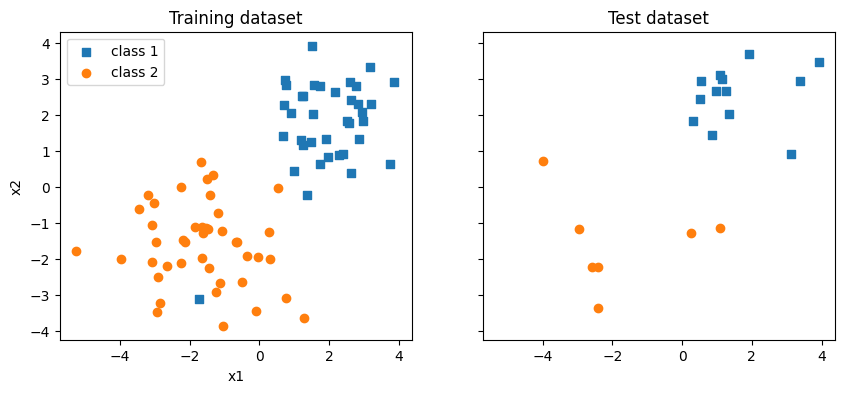

In [9]:
## remove 1st column before plotting; change shape(mx3) into shape(mx2) or use x_train, x_test
## x_train = X_train[ : , 1:]     

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 4))
ax[0].scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], label='class 1', marker='s')
ax[0].scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], label='class 2', marker='o')
ax[1].scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], label='class 1', marker='s')
ax[1].scatter(x_test[y_test==0, 0], x_test[y_test==0, 1], label='class 2', marker='o')
ax[0].set_title('Training dataset')
ax[1].set_title('Test dataset')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].legend()
plt.show()

## 2.6 편향을 포함하기 위한 특성 벡터 X의 자료 구조

- 훈련자료와 검증자료에 존재할 수 있는 편향$^{bias}$을 다루기 위하여 자료의 모든 각 특성에$x^{(i)}_0 = 1$추가합니다. 특성 $x^{(i)}_0 = 1$이 추가된 자료에 대해 대문자($X$)사용하여 다른 자료와 구별하도록 합니다.  
- np.c 와 np.r 은 넘피 배열에 행과 열을 추가하는데 사용하는 방법이며, 구체적인 것은 넘피 자료를 참고하십시오.  

In [10]:
X_train = np.c_[ np.ones(len(x_train)), x_train ]
X_test  = np.c_[ np.ones(len(x_test)), x_test ]
print(X_train[:5])

[[ 1.   -2.64 -2.2 ]
 [ 1.   -2.97 -1.53]
 [ 1.    1.    0.46]
 [ 1.   -2.84 -3.22]
 [ 1.   -0.05 -1.95]]


## 3.1 학습(훈련/예측) 단계: 퍼셉트론 코딩

앞에서 구현한 perceptron() 함수를 활용하여 다음과 일반적인 percetron_train() 함수를 어렵지 않게 만들 수 있습니다. 특히 이 함수는 다양한 인자를 받아서 학습 알고리즘을 수행함으로 산출되는 퍼셉트론의 가중치를 반환합니다.

앞 장에서 사용한 perceptron 함수와 다른 점은 가중치 w를 더 이상 매개변수롤 사용하지 않았으며, 대신에 입력 특성벡터에 X0 원소가 포함되어 있는지 여부를 알리는 매개변수가 새로 포함되었습니다. 

In [11]:
def perceptron_train(X, y, X0=False, eta=0.1, epochs=1, random_seed=1):
    """  Perceptron training function for binary class labels
    Input Parameters
        X : numpy.ndarray, shape=(n_samples, m_features), by default X0=False
            A 2D NumPy array containing the training examples
            or 
            If X0=True, X's shape=(n_samples, m_features+1) 
            It includes the bias or x0 = 1 for all samples 
        
        y : numpy.ndarray, shape=(n_samples,)
            A 1D NumPy array containing the true class labels
        
        X0: If True, then X must have X_0 = 1 in all samples.
             Set it Faslse, if X does not have X_0 
        
        eta : float (default: 0.1) 
            A learning rate for the parameter updates. Note that a learning
            rate has no effect on the direction of the decision boundary
            if the model weights are initialized to all zeros.
        
        epochs : int (default: 1), Number of passes over the training dataset.
        
        random_seed : int or None (default: 1)
            Seed for the pseudo-random number generator that initializes the
            weights w if w is None.
    
    Returns 
        w : numpy.ndarray, shape=(m_features, )
    
        If you wants W : numpy.ndarray, shape=(epochs, m_features) to use 
        when calling , then invoke this function with epochs = 1 multiple times 
        and save the result in the form of W = np.vstack([W, w]). 
        You may initialize the W = np.array([w]), where w is an initial weights.
    """
    if X0 == False:
        X = np.c_[ np.ones(len(X)), X ]
    
    randnum = np.random.RandomState(random_seed) 
    w = randnum.normal(loc=0.0, scale=0.01, size=X.shape[1])
           
    maxlabel, minlabel = y.max(), y.min()                 # for use of bipolar or unit step function
    for _ in range(epochs):
        for xi, yi in zip(X, y):
            z = np.dot(xi, w)                             # Compute net input, same as np.dot(w.T, x)
            yhat = np.where(z > 0.0, maxlabel, minlabel)  # Apply unit step func and get output
            #print('xi{}, \t (yi,yhat)=({},{})'.format(np.round(xi,2), yi, yhat))
            if yi != yhat:
                delta = eta * (yi - yhat) * xi                # Compute delta    
                w += delta                                    # Adjust weight
                #print('xi{}, \t (yi,yhat)=({},{}), delta{}, w{}'.format
                #         (np.round(xi,2), yi, yhat, np.round(delta,2), np.round(w,2)))
        
    return w

## 3.2 학습(훈련/예측) 단계: 퍼셉트론 호출

In [12]:
print(X_train[:5])
print(y_train[:5])
w = perceptron_train(X_train, y_train, X0=True, eta=0.02, epochs=1, random_seed=2)
print('w = ', w)

[[ 1.   -2.64 -2.2 ]
 [ 1.   -2.97 -1.53]
 [ 1.    1.    0.46]
 [ 1.   -2.84 -3.22]
 [ 1.   -0.05 -1.95]]
[0 0 1 0 0]
w =  [-0.02416758  0.04263733  0.01383804]


## 3.3 예측 및 평가 단계: binary pereceptron

In [13]:
def perceptron_predict(X, w):
    z = np.dot(X, w)
    yhat = np.where(z > 0., 1, 0)
    return yhat

## 3.4 예측 및 평가 단계: binary pereceptron

In [14]:
#version 0.1
print('w = ', w)
yhat = perceptron_predict(X_train, w) 
missed = 0 # misclassified count
m_samples = len(y_train)
for m in range(m_samples):
    if yhat[m] != y_train[m]:
        missed += 1
print('Misclassified:{}/{}'.format(missed, m_samples))

w =  [-0.02416758  0.04263733  0.01383804]
Misclassified:1/80


In [ ]:
#version 0.1
print('w = ', w)
yhat = perceptron_predict(X_train, w) 
missed = 0 # misclassified count
m_samples = len(y_train)
for m in range(m_samples):
    if yhat[m] != y_train[m]:
        missed += 1
print('Misclassified:{}/{}'.format(missed, m_samples))

In [23]:
#version 0.1
yhat = perceptron_predict(X_test, w) 
missed = 0 # misclassified count
m_samples = len(y_test)
for m in range(m_samples):
    if yhat[m] != y_test[m]:
        missed += 1
print('Misclassified:{}/{}'.format(missed, m_samples))

Misclassified:1/20


In [24]:
#version 0.2
yhat = perceptron_predict(X_test, w)
missed = np.sum(yhat.flatten() != y_test)
print('Misclassified:{}/{}'.format(missed, m_samples))

Misclassified:1/20


## 3.1 예측 및 평가 단계: 시각화

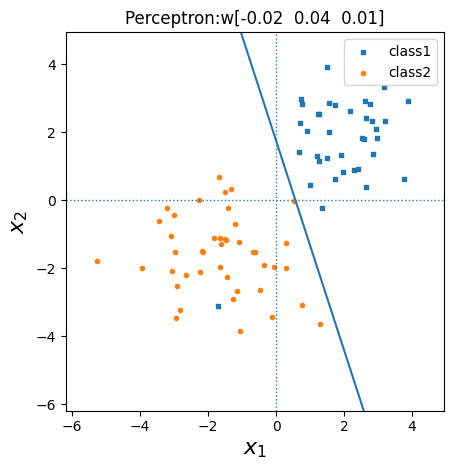

In [25]:
%run code/plot_xyw.py
plot_xyw(X_train, y_train, w.flatten(), X0=True)

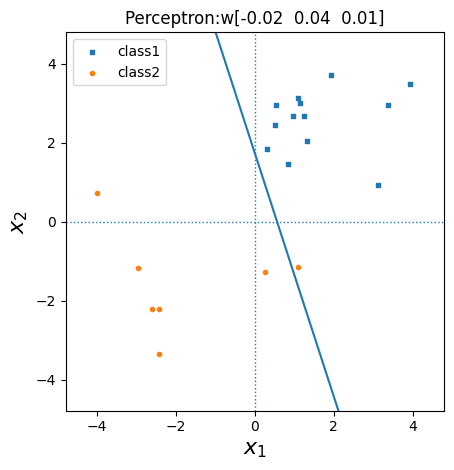

In [26]:
plot_xyw(X_test, y_test, w.flatten(), X0=True)